In [46]:
import pandas as pd
import numpy as np

# Load the datasets
X_train_final = pd.read_csv('data/X_train_final.csv')
y_train_final = pd.read_csv('data/y_train_final.csv')
X_test_final = pd.read_csv('data/X_test_final.csv')
y_test_final = pd.read_csv('data/y_test_final.csv')
y_train_final = y_train_final.squeeze()
y_test_final = y_test_final.squeeze()
target_clm='price'

In [54]:
import matplotlib.pyplot as plt
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))
    ax[0].plot(range(400), range(400), 'r--')

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
def sklearn_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    weights = model.coef_
    intercept = model.intercept_  # base price without any amenities
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return weights, y_pred, intercept, mse, rmse

In [57]:
weights, y_pred, intercept, mse, rmse=sklearn_regression(X_train_final, X_test_final, y_train_final, y_test_final)
print(f"mse:+{mse}")
print(f"intercept: {intercept}")
print(f"rmse:+{rmse}")
#plot_regression_results(y_test_final, y_pred, weights)

mse:+7580.6491947343175
intercept: 96.67334157368174
rmse:+87.06692365493521


MSE:  7580.6491947343175
r^2:  0.27604565142370296


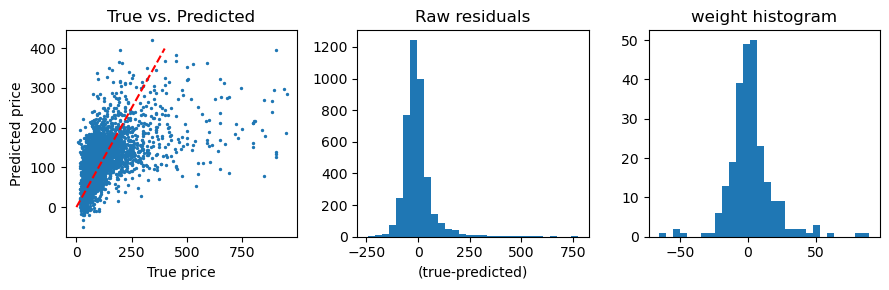

In [58]:
plot_regression_results(y_test_final, y_pred, weights)